In [1]:
import cv2
from IPython.display import Image, clear_output

from metadrive.engine.asset_loader import AssetLoader
from metadrive.envs.scenario_env import ScenarioEnv
from metadrive.policy.replay_policy import ReplayEgoCarPolicy
from metadrive.utils.doc_utils import generate_gif


In [2]:
# turn on this to enable 3D render. It only works when you have a screen
threeD_render=False 
# Use the built-in datasets with simulator
nuscenes_data=AssetLoader.file_path(AssetLoader.asset_path, "nuscenes", unix_style=False)

env = ScenarioEnv(
    {
        "reactive_traffic": False,
        "use_render": threeD_render,
        "agent_policy": ReplayEgoCarPolicy,
        "data_directory": nuscenes_data,
        "num_scenarios": 3,
    }
)


[INFO] Environment: ScenarioEnv
[INFO] MetaDrive version: 0.4.3
[INFO] Sensors: [lidar: Lidar(), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Horizon (Max steps per agent): None


In [3]:
try:
    scenarios={}
    for seed in range(3):
        print(f"\nSimulate Scenario: {seed}")
        o, _ = env.reset(seed=seed)
        semantic_map = seed == 1
        for i in range(1, 100000):
            o, r, tm, tc, info = env.step([1.0, 0.])
            env.render(mode="top_down",
                       window=False,
                       screen_record=True,
                       text={"Index": seed,
                             "semantic_map": semantic_map},
                       screen_size=(500, 500),
                       semantic_map=semantic_map) # semantic topdown
            if info["replay_done"]:
                break
        scenarios[seed]=env.top_down_renderer.screen_frames
finally:
    env.close()

[INFO] Assets version: 0.4.3



Simulate Scenario: 0


[INFO] Known Pipes: CocoaGraphicsPipe
[INFO] Start Scenario Index: 0, Num Scenarios : 3



Simulate Scenario: 1

Simulate Scenario: 2


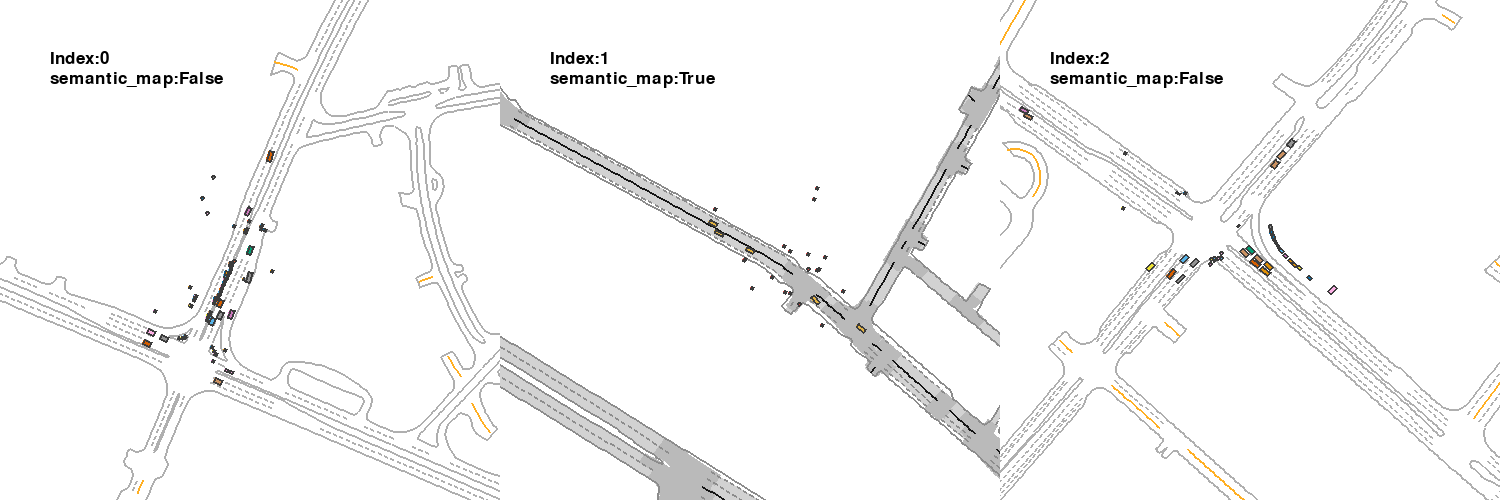

In [4]:
# make gif for three scenarios
frames=[]
min_len=min([len(scenario) for scenario in scenarios.values()])
for i in range(min_len):
    frames.append(cv2.hconcat([scenarios[s][i] for s in range(3)]))

clear_output()
generate_gif(frames)
Image(open("demo.gif", "rb").read())